![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

### 2. Preparación de datos

Una vez entendido el contexto de la problemática y realizado el análisis exploratorio de datos de acuerdo con la descripción del dataset y la información entregada al equipo en la fase anterior, se comparte un paso a paso que deberá ser diligenciado por el equipo de ciencia de datos asignado para esta tarea con el fin de guiar el proceso de EDA y preparación de datos, lo cual es crucial antes de desarollar el modelamiento. 

El estudio tiene como objetivo la clasificación de un paciente como hospitalizado o no hospitalizado.




Carguen la base de datos y revisen el tipo de cada columna del dataset. Si es necesario realicen conversiones de tipos de datos. 

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler

df = pd.read_excel('BBDD_Hospitalización.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    float64
 1   DIABETES                                                                   568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    object 
 3   PSA                                                                        564 non-null    float64
 4   BIOPSIAS PREVIAS                                                           566 non-null    object 
 5   VOLUMEN PROSTATICO                                                         567 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

d:\Proyectos\Data Science\Hospitales ML\venv\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [83]:
# remplazar los valores de No en 'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA' por nulos para trabajar con la columna
df.iloc[:, 11] = df.iloc[:, 11].replace('NO',np.nan)
df.iloc[:, 11] = df.iloc[:, 11].astype(float)
df['HOSPITALIZACION'].fillna(0, inplace=True)

df = df.drop([568, 569])

reemplazos = {"NO": 0, "SI": 1}
columnas_a_reemplazar = ["DIABETES", "HOSPITALIZACIÓN ULTIMO MES", "BIOPSIAS PREVIAS",'VOLUMEN PROSTATICO','CUP','FIEBRE','ITU','HOSPITALIZACION']
df[columnas_a_reemplazar] = df[columnas_a_reemplazar].replace(reemplazos)


df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    float64
 1   DIABETES                                                                   568 non-null    int64  
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    int64  
 3   PSA                                                                        564 non-null    float64
 4   BIOPSIAS PREVIAS                                                           566 non-null    float64
 5   VOLUMEN PROSTATICO                                                         567 non-null    float64
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

In [84]:
# remplazamos para crear correctamente los dummys
rep = {'FLUOROQUINOLONA_AMINOGLICÓSIDO':'FLUOROQUINOLONA_AMINOGLICOSIDO'}
df['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'] = df['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'].replace(rep)

df['BIOPSIA'] = df['BIOPSIA'].str.strip()

df['ENF. CRONICA PULMONAR OBSTRUCTIVA'] = df['ENF. CRONICA PULMONAR OBSTRUCTIVA'].replace('SI, EPOC','SI')
df['ENF. CRONICA PULMONAR OBSTRUCTIVA'] = df['ENF. CRONICA PULMONAR OBSTRUCTIVA'].replace('SI, ASMA','SI')
df['ENF. CRONICA PULMONAR OBSTRUCTIVA'] = df['ENF. CRONICA PULMONAR OBSTRUCTIVA'].replace(reemplazos)

Eliminen variables si es que consideran irrelevantes, sustentando adecuadamente por qué.

In [85]:
# se remueve los dias de hospitalizacion ya que no es parte de la prediccion encontrar los dias
# solamente se busca encontrar los pacientes que son hospitalizados
df.drop('DIAS HOSPITALIZACION MQ',axis=1,inplace=True)
df.drop('DIAS HOSPITALIZACIÓN UPC',axis=1,inplace=True)

# se eliminan estas  columnas porque esta relacionadas directamente con la columna 
# "NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA"
df.drop('TIPO DE CULTIVO',axis=1,inplace=True)
df.drop('AGENTE AISLADO',axis=1,inplace=True)
df.drop('PATRON DE RESISTENCIA',axis=1,inplace=True)

Revisen la distribución estadística para el caso de las variables numéricas. ¿Qué gráficos permiten realizar un estudio exploratorio de la distribución? ¿Hay datos atípicos?

In [86]:
# sns.pairplot(df, hue = 'HOSPITALIZACION')
# plt.show()

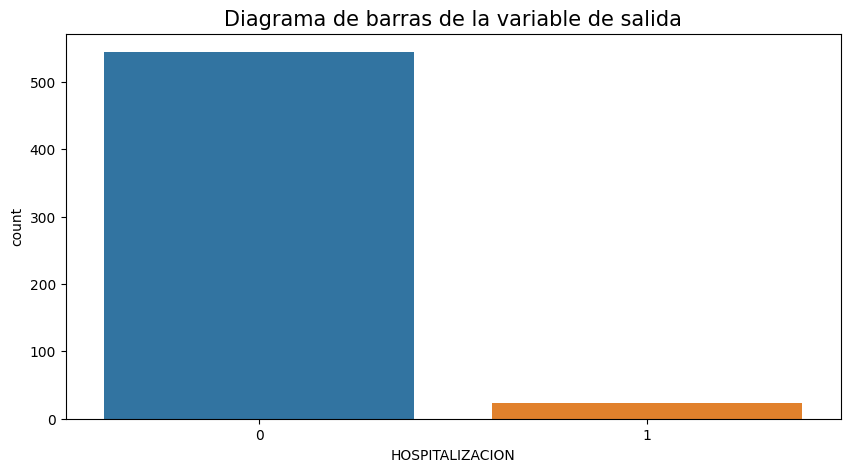

In [87]:
# ejemplo de revision de balanceo
plt.figure(figsize=(10,5))
sns.countplot(x = 'HOSPITALIZACION' ,label= 'Count', data = df)
plt.title('Diagrama de barras de la variable de salida', fontsize = 15)
plt.show()

Si encontraron datos atípicos, ¿Imputarán o eliminarán los valores? Sustentar.

In [88]:
# Se inputan los valores vacios con la media de PSA
media_psa = df['PSA'].mean()
df['PSA'].fillna(round(media_psa),inplace=True)

# se imputaron con la media los datos atipicos de la edad con la media de los datos restantes
media_menor_100 = df[df["EDAD"] < 100]["EDAD"].mean()
print(round(media_menor_100))
df.loc[df["EDAD"] > 100, "EDAD"] = media_menor_100

64


Para las variables categóricas, realizar una visualización adecuada para observar las frecuencias de cada categoría. ¿Observa alguna anomalía, problema de formato en alguna variable?


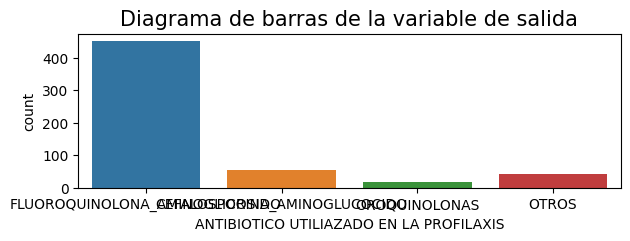

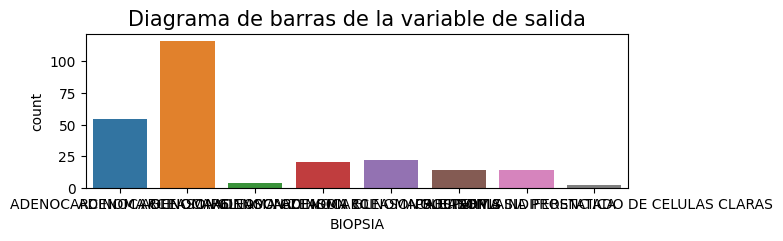

In [89]:
col_categoricas = ['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS','BIOPSIA']
valores_a_excluir = ['NO','NEG']

for col in col_categoricas:
    plt.figure(figsize=(7,2))

    # Filtrar los datos excluyendo los valores 'NO'
    data_filtrada = df[df[col].apply(lambda x: x not in valores_a_excluir)]

    sns.countplot(x = col ,label= 'Count', data = data_filtrada)
    plt.title('Diagrama de barras de la variable de salida', fontsize = 15)
    plt.show()


Revisen la cantidad de nulos que tiene cada columna. ¿Es necesario eliminar alguna columna? ¿Se imputarán valores? En caso de imputar, explicar en cada caso, por medio de qué estrategia lo harán. 

In [90]:
df['BIOPSIAS PREVIAS'].fillna(0,inplace=True)
df['VOLUMEN PROSTATICO'].fillna(0,inplace=True)
df['CUP'].fillna(0,inplace=True)
df['ENF. CRONICA PULMONAR OBSTRUCTIVA'].fillna(0,inplace=True)
# df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].fillna(0,inplace=True)
# df['AGENTE AISLADO'].fillna('NO',inplace=True)

media_psa = df['PSA'].mean()
df['PSA'].fillna(round(media_psa),inplace=True)

media_menor_100 = df[df["EDAD"] < 100]["EDAD"].mean()
print(round(media_menor_100))
df.loc[df["EDAD"] > 100, "EDAD"] = media_menor_100

df.info()

64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 15 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    float64
 1   DIABETES                                                                   568 non-null    int64  
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    int64  
 3   PSA                                                                        568 non-null    float64
 4   BIOPSIAS PREVIAS                                                           568 non-null    float64
 5   VOLUMEN PROSTATICO                                                         568 non-null    float64
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                

Para el caso de las variables numéricas, ¿Es necesario normalizar?

In [91]:
# NO

Realice las transformaciones que considere pertinentes con el fin de preparar los datos para un modelo de clasificación de un paciente con desenlace en Hospitalización.

In [93]:
# crear dummies

columna_categorica = "ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS"
df_dummies = pd.get_dummies(df[columna_categorica], prefix='ANTIBIOTICO USADO')
df_dum = pd.concat([df, df_dummies], axis=1)

columna_categorica2 = "BIOPSIA"
df_dummies2 = pd.get_dummies(df[columna_categorica2], prefix='BIOPSIA')
df_dum = pd.concat([df_dum, df_dummies2], axis=1)
df_dum.drop('ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS',axis=1,inplace=True)
df_dum.drop('BIOPSIA',axis=1,inplace=True)

df_dum

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,...,ANTIBIOTICO USADO_OTROS,BIOPSIA_ADENOCARCINOMA GLEASON 10,BIOPSIA_ADENOCARCINOMA GLEASON 6,BIOPSIA_ADENOCARCINOMA GLEASON 7,BIOPSIA_ADENOCARCINOMA GLEASON 8,BIOPSIA_ADENOCARCINOMA GLEASON 9,BIOPSIA_CARCINOMA INDIFERENCIADO DE CELULAS CLARAS,BIOPSIA_HIPERPLASIA PROSTATICA,BIOPSIA_NEG,BIOPSIA_PROSTATITIS
0,53.0,0,0,4.00,0.0,1.0,12.0,0.0,0.0,1.0,...,False,False,False,False,False,False,False,False,True,False
1,56.0,0,0,7.70,0.0,1.0,12.0,0.0,0.0,1.0,...,False,False,False,False,False,False,False,False,True,False
2,57.0,0,0,29.00,1.0,1.0,24.0,0.0,0.0,1.0,...,False,False,False,False,False,False,False,False,True,False
3,56.0,0,0,7.00,0.0,1.0,12.0,0.0,0.0,1.0,...,False,False,False,False,False,False,False,False,True,False
4,55.0,0,0,29.00,1.0,1.0,24.0,0.0,0.0,1.0,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,67.0,0,0,6.00,0.0,1.0,12.0,0.0,0.0,NaN,...,False,False,True,False,False,False,False,False,False,False
564,64.0,0,0,4.80,0.0,1.0,12.0,0.0,0.0,NaN,...,True,False,False,True,False,False,False,False,False,False
565,69.0,0,0,4.43,0.0,0.0,20.0,0.0,0.0,NaN,...,False,False,False,False,False,False,False,False,True,False
566,67.0,0,0,8.00,0.0,1.0,12.0,0.0,0.0,NaN,...,False,False,False,True,False,False,False,False,False,False


In [94]:
# balancear multiplicando los valores

# Separar las características y la variable objetivo
X = df_dum.drop('HOSPITALIZACION', axis=1)  # Características
y = df_dum['HOSPITALIZACION']  # Variable objetivo

# Crear el objeto de oversampling
oversampler = RandomOverSampler(sampling_strategy='minority')

# Aplicar el oversampling a las características y la variable objetivo
X_oversampled, y_oversampled = oversampler.fit_resample(X, y)

# Crear un nuevo DataFrame con las características oversampleadas y la variable objetivo
df_oversampled = pd.concat([X_oversampled, y_oversampled], axis=1)

df_oversampled

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,...,BIOPSIA_ADENOCARCINOMA GLEASON 10,BIOPSIA_ADENOCARCINOMA GLEASON 6,BIOPSIA_ADENOCARCINOMA GLEASON 7,BIOPSIA_ADENOCARCINOMA GLEASON 8,BIOPSIA_ADENOCARCINOMA GLEASON 9,BIOPSIA_CARCINOMA INDIFERENCIADO DE CELULAS CLARAS,BIOPSIA_HIPERPLASIA PROSTATICA,BIOPSIA_NEG,BIOPSIA_PROSTATITIS,HOSPITALIZACION
0,53.0,0,0,4.0,0.0,1.0,12.0,0.0,0.0,1.0,...,False,False,False,False,False,False,False,True,False,1
1,56.0,0,0,7.7,0.0,1.0,12.0,0.0,0.0,1.0,...,False,False,False,False,False,False,False,True,False,1
2,57.0,0,0,29.0,1.0,1.0,24.0,0.0,0.0,1.0,...,False,False,False,False,False,False,False,True,False,1
3,56.0,0,0,7.0,0.0,1.0,12.0,0.0,0.0,1.0,...,False,False,False,False,False,False,False,True,False,1
4,55.0,0,0,29.0,1.0,1.0,24.0,0.0,0.0,1.0,...,False,False,False,False,False,False,False,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083,55.0,1,1,4.0,0.0,1.0,12.0,0.0,0.0,2.0,...,False,False,False,False,False,False,False,True,False,1
1084,64.0,1,0,5.7,0.0,1.0,24.0,0.0,0.0,3.0,...,False,False,False,False,False,False,False,True,False,1
1085,55.0,0,0,29.0,1.0,1.0,24.0,0.0,0.0,1.0,...,False,False,False,False,False,False,False,True,False,1
1086,43.0,0,0,6.0,0.0,0.0,12.0,0.0,0.0,2.0,...,False,False,False,False,False,False,False,True,False,1


Realice una matriz de correlación con el fin de determinar si hay variables redundantes. En caso de encontrar altas correlaciones, ¿Tomará alguna acción?

In [99]:
corr = df_oversampled.corr()
plt.figure(figsize=(100,100))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 45},
           xticklabels= df_oversampled.columns,
           yticklabels= df_oversampled.columns,
           cmap= 'coolwarm')
plt.show()

Exporte la base de datos preparada en un archivo .csv para el modelamiento. 

In [ ]:
df_oversampled.to_csv('revision.csv')